# Seminar 1 — Dog Socks Grid Environment

This notebook demonstrates how to use the SocksGridEnv with the EpisodeLengthWrapper.

## Environment Details
- **Grid Size**: 4x4
- **Actions**: LEFT, RIGHT, TOP, DOWN, PICK_UP, PUT
- **Rewards**: +1 for success, -1 for wrong placement, 0 otherwise
- **Max Episode Length**: 50 steps

In [1]:
! pip install -e .

Obtaining file:///Users/zoya/Documents/rl_seminara
  Preparing metadata (setup.py) ... done
  Attempting uninstall: jack-the-dog
    Found existing installation: jack-the-dog 0.1.0
    Uninstalling jack-the-dog-0.1.0:
      Successfully uninstalled jack-the-dog-0.1.0
  Running setup.py develop for jack-the-dog


In [2]:
# Import required modules
from jack_the_dog import SocksGridEnv, EpisodeLengthWrapper
import gymnasium as gym

pygame 2.6.0 (SDL 2.28.4, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Create Environment

Create the base environment and wrap it with the episode length limit.

In [3]:
# Create the base environment
env = SocksGridEnv(render_mode="rgb_array", seed=42)

print("Environment created successfully!")
print(f"Action space: {env.action_space}")
print(f"Observation space: {env.observation_space}")

Environment created successfully!
Action space: Discrete(6)
Observation space: Box(0, 3, (7,), int32)


In [4]:
# Generate all possible environment states and count them
# Observation: [dog_x, dog_y, socks_x, socks_y, target_x, target_y, has_socks]
# This env uses Box(0, 3, (7,), int32) - no .n or .nvec; we enumerate by bounds.

import itertools
import numpy as np

# Ranges for each dimension: positions 0..3 (4x4 grid), has_socks 0 or 1
grid_size = 4
ranges = [
    range(grid_size),   # dog_x
    range(grid_size),   # dog_y
    range(grid_size),   # socks_x
    range(grid_size),   # socks_y
    range(grid_size),   # target_x
    range(grid_size),   # target_y
    range(2),           # has_socks (0 or 1)
]

# Generate all combinations
all_states = np.array(list(itertools.product(*ranges)))
state_count = len(all_states)

print(f"Total number of possible environment states: {state_count}")
print(f"Shape of all_states array: {all_states.shape}")
print("\nFirst 5 states (dog_x, dog_y, socks_x, socks_y, target_x, target_y, has_socks):")
print(all_states[:5])

Total number of possible environment states: 8192
Shape of all_states array: (8192, 7)

First 5 states (dog_x, dog_y, socks_x, socks_y, target_x, target_y, has_socks):
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 1 1]
 [0 0 0 0 0 2 0]]


## Run Episodes

Run a few episodes with random actions to see how the environment works.

Initial observation: [2 2 0 1 2 3 0]
(dog_x, dog_y, socks_x, socks_y, target_x, target_y, has_socks)


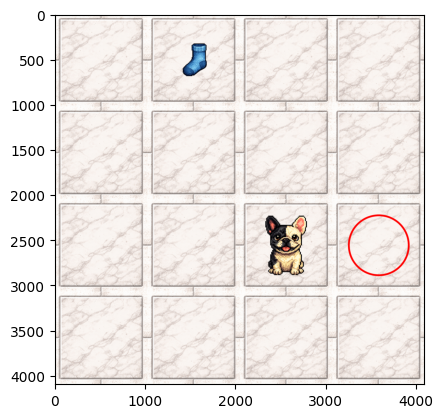

In [5]:
import matplotlib.pyplot as plt

action_names = ["LEFT", "RIGHT", "TOP", "DOWN", "PICK_UP", "PUT"]

observation, info = env.reset()
total_reward = 0
step = 0

print(f"Initial observation: {observation}")
print("(dog_x, dog_y, socks_x, socks_y, target_x, target_y, has_socks)")
env.render()

terminated = False
truncated = False

img = env.render()
plt.imshow(img)
plt.show()


Reward: 0
Terminated: False, Truncated: False
New observation: [2 1 0 1 2 3 0]


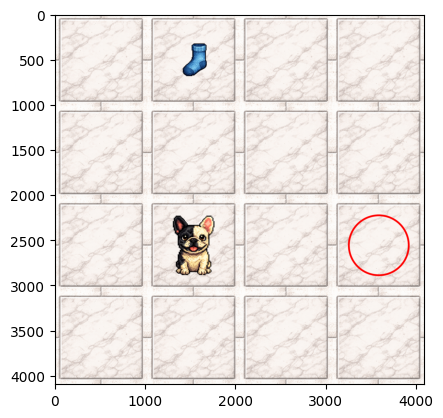

In [6]:
from jack_the_dog import ACTION

# Make action LEFT
observation, reward, terminated, truncated, info = env.step(ACTION.LEFT)
env.render()
print(f"Reward: {reward}")
print(f"Terminated: {terminated}, Truncated: {truncated}")
print(f"New observation: {observation}")

img = env.render()
plt.imshow(img)

Reward: 0
Terminated: False, Truncated: False
New observation: [1 1 0 1 2 3 0]
Reward: 0
Terminated: False, Truncated: False
New observation: [0 1 0 1 2 3 0]
Reward: 0
Terminated: False, Truncated: False
New observation: [0 1 0 1 2 3 1]


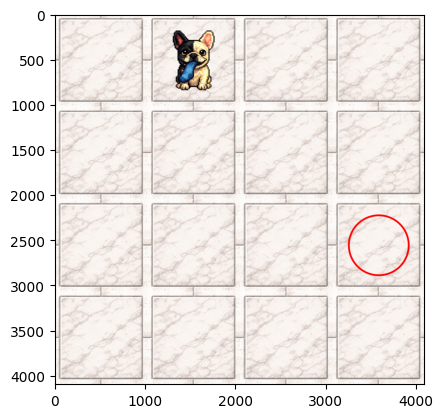

In [7]:
# Make steps untill pick-up socks
from jack_the_dog import SocksGridEnv, ACTION
actions = [ACTION.TOP, ACTION.TOP,  ACTION.PICK_UP]

for action in actions:
    observation, reward, terminated, truncated, info = env.step(action)
    env.render()
    print(f"Reward: {reward}")
    print(f"Terminated: {terminated}, Truncated: {truncated}")
    print(f"New observation: {observation}")

img = env.render()
plt.imshow(img)

Reward: 0
Reward: 0
Reward: 0
Reward: 0
Reward: 1
What a good boy!


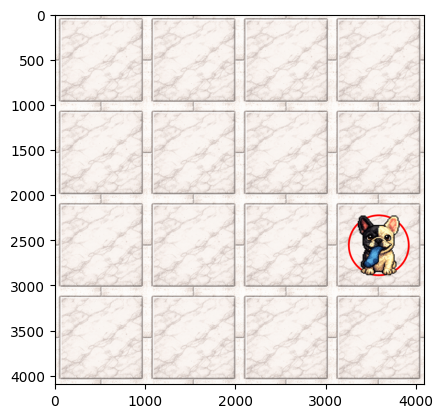

In [8]:
# Make actions untill put socks
actions = [ACTION.RIGHT, ACTION.RIGHT, ACTION.DOWN, ACTION.DOWN, ACTION.PUT]

for action in actions:
    observation, reward, terminated, truncated, info = env.step(action)
    env.render()
    print(f"Reward: {reward}")
    
    if terminated:
        print("What a good boy!")
        break
    
    img = env.render()
    plt.imshow(img)
     

### Add Terminal Wrapper



In [9]:
# Add wrapper with constraint on steps count
env = SocksGridEnv(render_mode="rgb_array", seed=42)

# Wrap it with episode length limit (max 50 steps)
env = EpisodeLengthWrapper(env, max_episode_steps=20)

In [10]:
# Random Jack actions untill episode ends

done = False

while not done:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    env.render()
    print(f"Reward: {reward}")
    done = terminated or truncated
    
    if truncated:
        print("Jack is too lazy to continue")
    if terminated:
        print("What a good boy!")

Reward: 0
Reward: 0
Reward: 0
Reward: 0
Reward: 0
Reward: 0
Reward: 0
Reward: 0
Reward: 0
Reward: 0
Reward: 0
Reward: 0
Reward: 0
Reward: 0
Reward: 0
Reward: 0
Reward: 0
Reward: 0
Reward: 0
Reward: 0
Jack is too lazy to continue


### Task 1: Make a custom wrapper thar gives additional reward when Jack picks up socks


In [ ]:
### YOUR CODE HERE
# class RewardWrapper(gym.Wrapper):
#     def __init__(self, env):
#         super().__init__(env)
        
#     def step(self, action):
#         observation, reward, terminated, truncated, info = self.env.step(action)
        
#         pass
        
#         return observation, reward, terminated, truncated, info    
### 


In [12]:
# The code check if Jack got reword when he picks up socks
# Add wrapper with constraint on steps count
env = SocksGridEnv(render_mode="rgb_array", seed=42)

# Wrap it with episode length limit (max 50 steps)
env = EpisodeLengthWrapper(env, max_episode_steps=20)

env = RewardWrapper(env)

trakectory_to_put_socks = [ACTION.LEFT, ACTION.TOP, ACTION.TOP]

for action in trakectory_to_put_socks:
    observation, reward, terminated, truncated, info = env.step(action)
    try:
        assert reward == 0.0, "Bad boy Jack should not get reward for this action"
    except AssertionError as e:
        print(e)


observation, reward, terminated, truncated, info = env.step(ACTION.PICK_UP)
try:
    assert reward == 0.5, "Jack should get reward when he picks up socks"
except AssertionError as e:
    print(e)
else:
    print("Test passed: Jack is a good boy!")


Test passed: Jack is a good boy!


/Users/zoya/miniconda3/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.socks_x to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.socks_x` for environment variables or `env.get_wrapper_attr('socks_x')` that will search the reminding wrappers.
  logger.warn(
/Users/zoya/miniconda3/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.dog_x to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.dog_x` for environment variables or `env.get_wrapper_attr('dog_x')` that will search the reminding wrappers.
  logger.warn(
/Users/zoya/miniconda3/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.socks_y to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.socks_y` for environment variables or `env.get_wrap

### Task 2: Print all possible environment states 

In [ ]:
### YOUR CODE HERE


# def get_all_states_for_seed(env: SocksGridEnv, seed: int) -> dict[int, dict]:
#     """
#     For a fixed seed, generate all states reachable from the initial state.
#     Returns a dict mapping state index (1, 2, ...) to state dict with keys:
#     dog_x, dog_y, socks_x, socks_y, target_x, target_y, has_socks.
#     """
#     pass
#     return result



In [14]:
env = SocksGridEnv(render_mode="rgb_array", seed=42)
count = len(get_all_states_for_seed(env, 42))

try:
    assert count == 480, "Wrong number of possible environment states"
except AssertionError as e:
    print(e)
else:
    print("Test passed: All possible environment states printed")



Test passed: All possible environment states printed
